# Data Loading And Exploration

*The dataset selected to replicate the paper is H3K4me1. We performed an exploratory analysis and found that the statistics summary of the base length to be a bit off, meaning that the base lenghts of all the DNA samples are not equal. We then processed to check the outliers and removed them.*

                 id                                           sequence class
0    >iTELL-Chr1_61  CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...     0
1    >iYAL068C_2263  CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...     0
2  >iYAL067W-A_2858  CTGAATTCAGTCTGCTTTAAACGGCTTCCGCGGAGGAAATATTTCC...     0
3  >iYAL067W-A_3010  TAGCCGCTGAGAAGCGGATGGTAATGAGACAAGTTGATATCAAACA...     0
4  >iYAL067W-A_3525  AGGGAAACAGTAAACAGTGAAAATTCTCTTGAGAACCAAAGTAAAC...     0
Index(['id', 'sequence', 'class'], dtype='object')
id          0
sequence    0
class       0
dtype: int64
class
1    17266
0    14411
Name: count, dtype: int64
count    31677.000000
mean       499.987373
std          1.591140
min        290.000000
25%        500.000000
50%        500.000000
75%        500.000000
max        500.000000
Name: sequence_length, dtype: float64


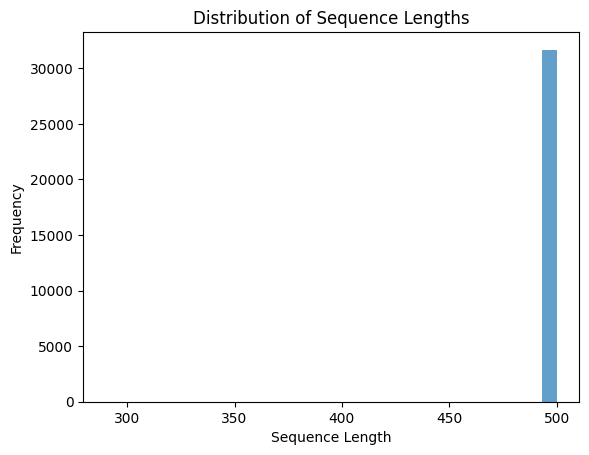

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\\Users\shire\OneDrive\Desktop\histone\histone\H3K4me1.txt"

# Initialize lists to store the data
ids = []
sequences = []
classes = []

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

    # Process lines in chunks of 3
    for i in range(0, len(lines), 3):
        ids.append(lines[i].strip())
        sequences.append(lines[i+1].strip())
        classes.append(lines[i+2].strip())

# Construct the DataFrame
data = {'id': ids, 'sequence': sequences, 'class': classes}
df = pd.DataFrame(data)

# Display the first few rows to verify the DataFrame
print(df.head())
print(df.columns)

# Perform Exploratory Data Analysis (EDA)

# Check for missing values
print(df.isnull().sum())

# Count the number of unique classes
print(df['class'].value_counts())

# Calculate sequence lengths
df['sequence_length'] = df['sequence'].apply(len)

# Summary statistics for sequence lengths
print(df['sequence_length'].describe())

# Plot the distribution of sequence lengths
plt.hist(df['sequence_length'], bins=30, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()


Number of sequences with length not equal to 500: 2
                  id  sequence_length class
0     >iTELL-Chr1_61              310     0
9778  >iTELL-Chr7_41              290     0


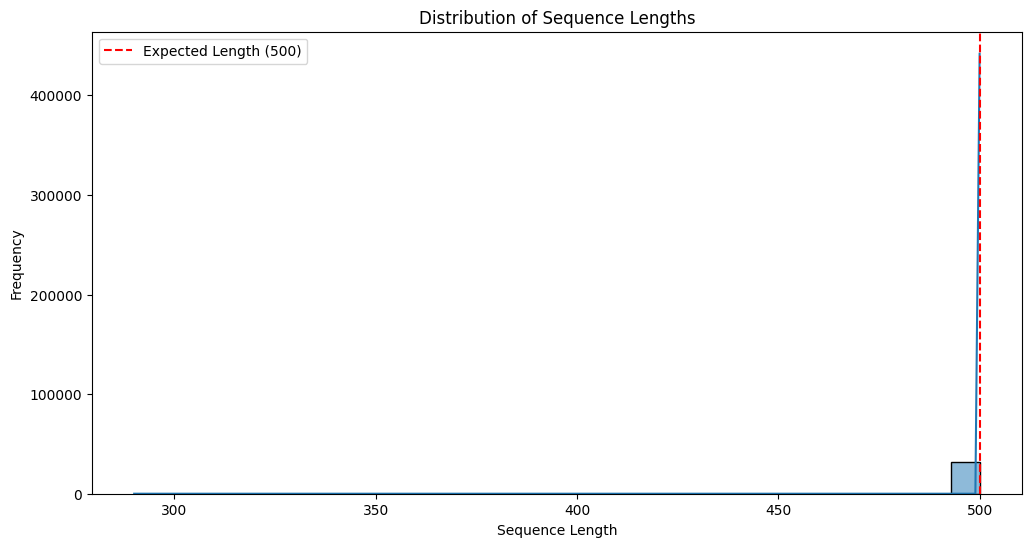

Sequences with length not equal to 500:
                  id                                           sequence  \
0     >iTELL-Chr1_61  CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...   
9778  >iTELL-Chr7_41  CACACCCACACACACCACACCCACACCCACACACTACCCTAACACT...   

      sequence_length class  
0                 310     0  
9778              290     0  
Number of sequences with length equal to 500: 31675
                 id                                           sequence class  \
1    >iYAL068C_2263  CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...     0   
2  >iYAL067W-A_2858  CTGAATTCAGTCTGCTTTAAACGGCTTCCGCGGAGGAAATATTTCC...     0   
3  >iYAL067W-A_3010  TAGCCGCTGAGAAGCGGATGGTAATGAGACAAGTTGATATCAAACA...     0   
4  >iYAL067W-A_3525  AGGGAAACAGTAAACAGTGAAAATTCTCTTGAGAACCAAAGTAAAC...     0   
5  >iYAL067W-A_3619  GGTTTCCATACCTCCCCAGCATCATACATCTTTTTTCAAAGAAACT...     0   

   sequence_length  
1              500  
2              500  
3              500  
4              500  
5     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the txt file
data = open(r"C:\\Users\shire\OneDrive\Desktop\Project\H3K4me1.txt", 'r').read().splitlines()

# Process the data
ids = data[0::3]
sequences = data[1::3]
classes = data[2::3]

# Create a DataFrame
df = pd.DataFrame({'id': ids, 'sequence': sequences, 'class': classes})

# Create a new column for sequence lengths
df['sequence_length'] = df['sequence'].apply(len)

# Identify sequences with lengths not equal to 500
outliers = df[df['sequence_length'] != 500]

# Display the outliers
print(f'Number of sequences with length not equal to 500: {len(outliers)}')
print(outliers[['id', 'sequence_length', 'class']])

# Plot the sequence lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['sequence_length'], kde=True, bins=30)
plt.axvline(x=500, color='red', linestyle='--', label='Expected Length (500)')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Highlight outliers
print(f'Sequences with length not equal to 500:')
print(outliers[['id', 'sequence', 'sequence_length', 'class']])

df_filtered = df[df['sequence_length'] == 500]

# Display the filtered DataFrame
print(f'Number of sequences with length equal to 500: {len(df_filtered)}')
print(df_filtered.head())

df_filtered = df[df['sequence_length'] == 500]

# Display the filtered DataFrame
print(f'Number of sequences with length equal to 500: {len(df_filtered)}')
print(df_filtered.head())

# Save the filtered DataFrame to a CSV file
df_filtered.to_csv(r'C:\\Users\shire\OneDrive\Desktop\Project\dataset.csv', index=False)

print('Filtered sequences have been saved')

# Save the filtered DataFrame to a text file
with open(r'C:\\Users\shire\OneDrive\Desktop\Project\dataset.txt', 'w') as f:
    for idx, row in df_filtered.iterrows():
        f.write(f"{row['id']}\n")
        f.write(f"{row['sequence']}\n")
        f.write(f"{row['class']}\n")

print('Filtered sequences have been saved')




                 id                                           sequence class
0    >iYAL068C_2263  CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...     0
1  >iYAL067W-A_2858  CTGAATTCAGTCTGCTTTAAACGGCTTCCGCGGAGGAAATATTTCC...     0
2  >iYAL067W-A_3010  TAGCCGCTGAGAAGCGGATGGTAATGAGACAAGTTGATATCAAACA...     0
3  >iYAL067W-A_3525  AGGGAAACAGTAAACAGTGAAAATTCTCTTGAGAACCAAAGTAAAC...     0
4  >iYAL067W-A_3619  GGTTTCCATACCTCCCCAGCATCATACATCTTTTTTCAAAGAAACT...     0
Index(['id', 'sequence', 'class'], dtype='object')
id          0
sequence    0
class       0
dtype: int64
class
1    17266
0    14409
Name: count, dtype: int64
count    31675.0
mean       500.0
std          0.0
min        500.0
25%        500.0
50%        500.0
75%        500.0
max        500.0
Name: sequence_length, dtype: float64


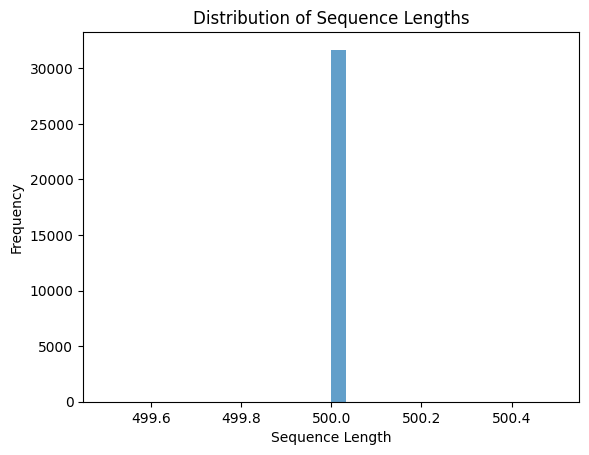

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\\Users\shire\OneDrive\Desktop\Project\dataset.txt'

# Initialize lists to store the data
ids = []
sequences = []
classes = []

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

    # Process lines in chunks of 3
    for i in range(0, len(lines), 3):
        ids.append(lines[i].strip())
        sequences.append(lines[i+1].strip())
        classes.append(lines[i+2].strip())

# Construct the DataFrame
data = {'id': ids, 'sequence': sequences, 'class': classes}
df = pd.DataFrame(data)

# Display the first few rows to verify the DataFrame
print(df.head())
print(df.columns)

# Perform Exploratory Data Analysis (EDA)

# Check for missing values
print(df.isnull().sum())

# Count the number of unique classes
print(df['class'].value_counts())

# Calculate sequence lengths
df['sequence_length'] = df['sequence'].apply(len)

# Summary statistics for sequence lengths
print(df['sequence_length'].describe())

# Plot the distribution of sequence lengths
plt.hist(df['sequence_length'], bins=30, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Sequence Representation and Embedding techniques

*starting with 3 mer representation*

In [9]:
import keras
keras.__version__
keras.preprocessing
from keras.preprocess

<module 'keras.preprocessing' from 'C:\\Users\\shire\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\keras\\api\\preprocessing\\__init__.py'>

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the filtered dataset
with open(r'C:\\Users\shire\OneDrive\Desktop\Project\dataset.txt', 'r') as file:
    lines = file.read().splitlines()

ids = lines[0::3]
sequences = lines[1::3]
classes = lines[2::3]

# 3-mer representation
def k_mer(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

k_mer_sequences = [k_mer(seq) for seq in sequences]

print('done')


done


*One-hot code representation*

In [21]:
# Embedding: SequenceEmbedding1D (One-Hot Encoding)
def one_hot_encode(k_mer_sequence):
    vocab_size = 64  # 4^3 possible 3-mers
    one_hot_encoded = []
    for mer in k_mer_sequence:
        index = one_hot(mer, vocab_size)
        one_hot_encoded.append(index[0])
    return one_hot_encoded

one_hot_encoded_sequences = [one_hot_encode(seq) for seq in k_mer_sequences]

# Flatten one-hot encoded sequences for visualization
flattened_one_hot_encoded = [np.array(seq).flatten() for seq in one_hot_encoded_sequences]

# Convert classes to numeric labels for visualization
label_map = {label: idx for idx, label in enumerate(set(classes))}
numeric_labels = [label_map[label] for label in classes]

print("done")


done


# Implenting The CNN architecture 


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.5321 - loss: 3.5823 - val_accuracy: 0.5514 - val_loss: 1.0545
Epoch 2/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.5594 - loss: 0.9880 - val_accuracy: 0.5714 - val_loss: 0.8395
Epoch 3/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.5539 - loss: 0.8184 - val_accuracy: 0.5776 - val_loss: 0.7614
Epoch 4/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.5732 - loss: 0.7655 - val_accuracy: 0.5692 - val_loss: 0.7299
Epoch 5/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.5657 - loss: 0.7260 - val_accuracy: 0.5635 - val_loss: 0.7166
Epoch 6/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.5664 - loss: 0.7134 - val_accuracy: 0.5752 - val_loss: 0.7028
Epoch 7/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.5729 - loss: 0.7033 - val_accuracy: 0.5695 - val_loss: 0.6991
Epoch 8/100
594/594 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5732 - loss: 0

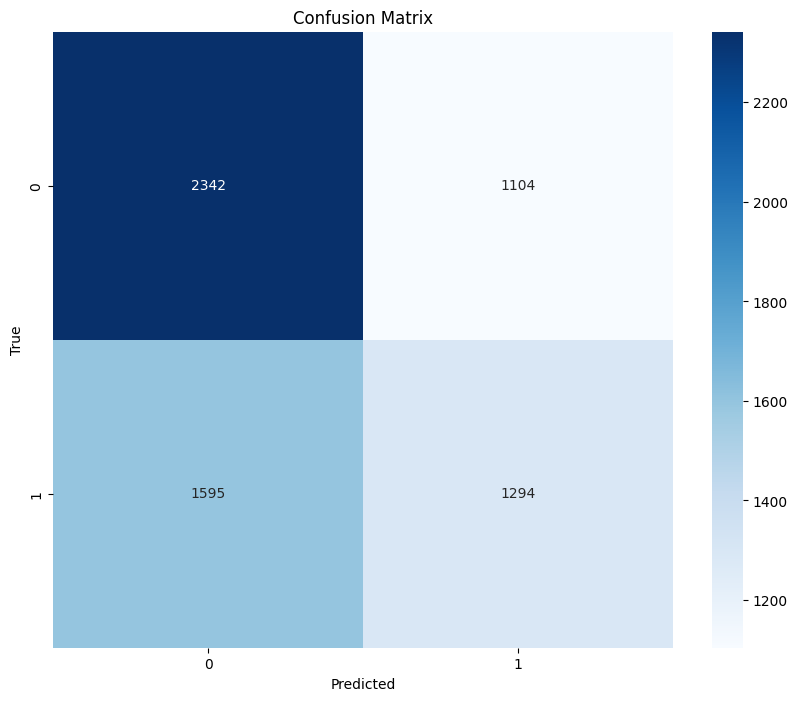

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63      3446
           1       0.54      0.45      0.49      2889

    accuracy                           0.57      6335
   macro avg       0.57      0.56      0.56      6335
weighted avg       0.57      0.57      0.57      6335



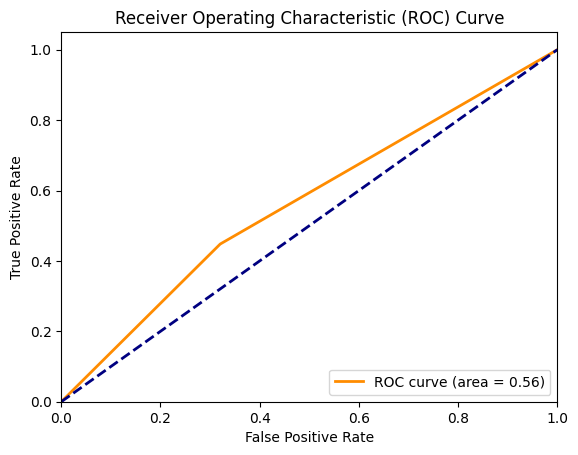

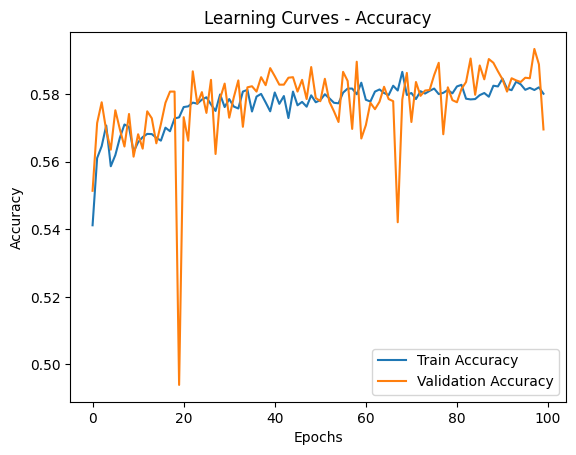

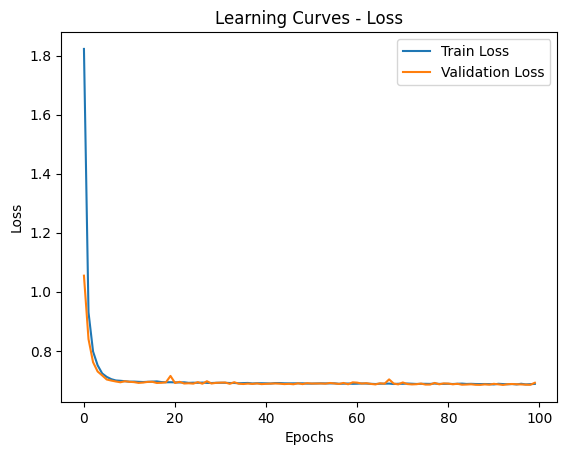

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
# Assuming one_hot_encoded_sequences and classes are ready from the previous steps
one_hot_encoded_sequences = np.array(flattened_one_hot_encoded)
numeric_labels = np.array(numeric_labels)

# Split the data into training, validation, and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(one_hot_encoded_sequences, numeric_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Ensure the data is in the correct shape for Conv1D (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=62, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}')
print(f'Train Accuracy: {train_accuracy}')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_true, y_pred)
print('Classification Report:')
print(class_report)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting Learning Curves
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves - Loss')
plt.legend()
plt.show()
